<a href="https://colab.research.google.com/github/ReynaraEzra/Liveness-Detection/blob/main/Liveness%20Detection%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Liveness Detection**
By : Reynara Ezra Pratama

Dataset : [CelebA Spoof](https://www.kaggle.com/attentionlayer241/celeba-spoof-for-face-antispoofing)

## Import Library

In [19]:
import tensorflow as tf
print(tf.__version__)

2.6.0
time: 1.6 ms (started: 2021-10-26 08:31:35 +00:00)


In [20]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.17 s (started: 2021-10-26 08:31:36 +00:00)


In [21]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Liveness Detection/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Liveness Detection/Dataset')
zip_ref.close()

time: 51.9 ms (started: 2021-10-26 08:31:39 +00:00)


In [22]:
print(os.listdir('/tmp/Liveness Detection/Dataset'))

['Spoof', 'Live']
time: 1.41 ms (started: 2021-10-26 08:31:40 +00:00)


## Check Data

In [23]:
import os

print('Number of Real Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Live'))))
print('Number of Spoof Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof'))))
print('Total Images : {}'.format(
    len(os.listdir('/tmp/Liveness Detection/Dataset/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof')) 
    )
)

Number of Real Images : 29
Number of Spoof Images : 30
Total Images : 59
time: 4.1 ms (started: 2021-10-26 08:31:41 +00:00)


## Split Data Into Training and Testing

In [7]:
# !pip install split_folders
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Liveness Detection', 
#                    '/content/drive/MyDrive/Liveness Detection/Data', 
#                    seed=1, 
#                    ratio=(0.8, 0.2))

Copying files: 59 files [00:09,  5.93 files/s]

time: 13.3 s (started: 2021-10-26 08:30:05 +00:00)


In [24]:
base_dir = '/content/drive/MyDrive/Liveness Detection/Data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

time: 2.23 ms (started: 2021-10-26 08:31:45 +00:00)


In [25]:
os.listdir('/content/drive/MyDrive/Liveness Detection/Data/train')

['Spoof', 'Live']

time: 9.43 ms (started: 2021-10-26 08:31:47 +00:00)


In [26]:
os.listdir('/content/drive/MyDrive/Liveness Detection/Data/val')

['Spoof', 'Live']

time: 7.15 ms (started: 2021-10-26 08:31:48 +00:00)


In [28]:
train_live_dir = os.path.join(train_dir, 'Live')
train_spoof_dir = os.path.join(train_dir, 'Spoof')

validation_live_dir = os.path.join(validation_dir, 'Live')
validation_spoof_dir = os.path.join(validation_dir, 'Spoof')

time: 3.15 ms (started: 2021-10-26 08:32:08 +00:00)


## Check Train and Test Data

**Train Data**

In [29]:
total_size_train = (
    len(os.listdir('/content/drive/MyDrive/Liveness Detection/Data/train/Live')) + 
    len(os.listdir('/content/drive/MyDrive/Liveness Detection/Data/train/Spoof'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 47
time: 9.63 ms (started: 2021-10-26 08:32:10 +00:00)


**Test Data**

In [31]:
total_size_test = (
    len(os.listdir('/content/drive/MyDrive/Liveness Detection/Data/val/Live')) + 
    len(os.listdir('/content/drive/MyDrive/Liveness Detection/Data/val/Spoof'))
)
print('Total Testing Data is : {}'.format(total_size_test))

Total Testing Data is : 12
time: 6.6 ms (started: 2021-10-26 08:32:15 +00:00)


## Image Augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

Found 47 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
time: 221 ms (started: 2021-10-26 08:32:15 +00:00)


## Construct Model Using CNN

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 92.8 ms (started: 2021-10-26 08:32:16 +00:00)


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [35]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 10.6 ms (started: 2021-10-26 08:32:16 +00:00)


In [36]:
history = model.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
2/2 [==============================] - 2s 520ms/step - loss: 0.8511 - accuracy: 0.3191 - val_loss: 0.7571 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 293ms/step - loss: 0.7354 - accuracy: 0.4894 - val_loss: 0.6799 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 290ms/step - loss: 0.6605 - accuracy: 0.4894 - val_loss: 0.6259 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 1s 525ms/step - loss: 0.5958 - accuracy: 0.7447 - val_loss: 0.5492 - val_accuracy: 0.5833
Epoch 5/50
2/2 [==============================] - 1s 296ms/step - loss: 0.4677 - accuracy: 0.8936 - val_loss: 0.3858 - val_accuracy: 0.9167
Epoch 6/50
2/2 [==============================] - 1s 518ms/step - loss: 0.3189 - accuracy: 0.9362 - val_loss: 0.6412 - val_accuracy: 0.6667
Epoch 7/50
2/2 [==============================] - 1s 296ms/step - loss: 0.4194 - accuracy: 0.8723 - val_loss: 0.3963 - val_accuracy: 0.8333
Epoch 8/50
2/2 [====

In [37]:
model_1 = tf.keras.models.Sequential([
# first CONV => RELU => CONV => RELU => POOL layer set                                   
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150, 150, 3)),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# second CONV => RELU => CONV => RELU => POOL layer set
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# first (and only) set of FC => RELU layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Dropout(0.5), 

# softmax classifier
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 108 ms (started: 2021-10-26 08:32:56 +00:00)


In [38]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 10 ms (started: 2021-10-26 08:32:56 +00:00)


In [39]:
history_1 = model_1.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
2/2 [==============================] - 3s 914ms/step - loss: 1.0761 - accuracy: 0.4468 - val_loss: 1.0823 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 510ms/step - loss: 1.6227 - accuracy: 0.4894 - val_loss: 0.6570 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 514ms/step - loss: 0.7076 - accuracy: 0.5957 - val_loss: 0.6584 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 1s 514ms/step - loss: 0.7905 - accuracy: 0.5319 - val_loss: 0.6555 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 1s 537ms/step - loss: 0.6966 - accuracy: 0.5106 - val_loss: 0.6549 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 1s 525ms/step - loss: 0.6579 - accuracy: 0.7021 - val_loss: 0.6451 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 1s 272ms/step - loss: 0.6466 - accuracy: 0.7021 - val_loss: 0.6308 - val_accuracy: 1.0000
Epoch 8/50
2/2 [====

## Plot Model History

In [40]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 26.6 ms (started: 2021-10-26 08:33:36 +00:00)


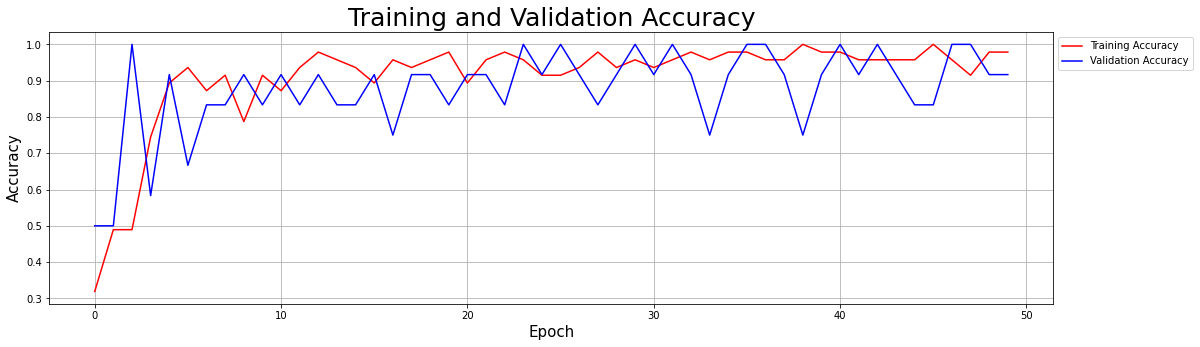

time: 307 ms (started: 2021-10-26 08:33:36 +00:00)


In [41]:
plot_accuracy(history)

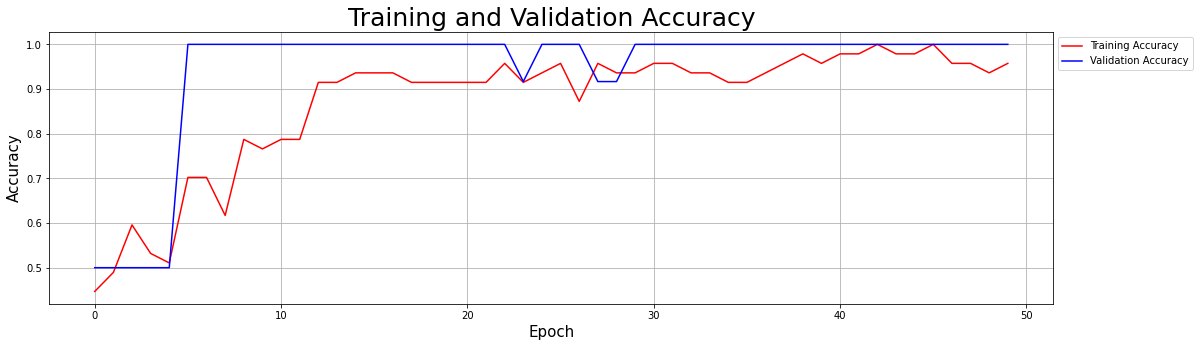

time: 484 ms (started: 2021-10-26 08:33:37 +00:00)


In [42]:
plot_accuracy(history_1)

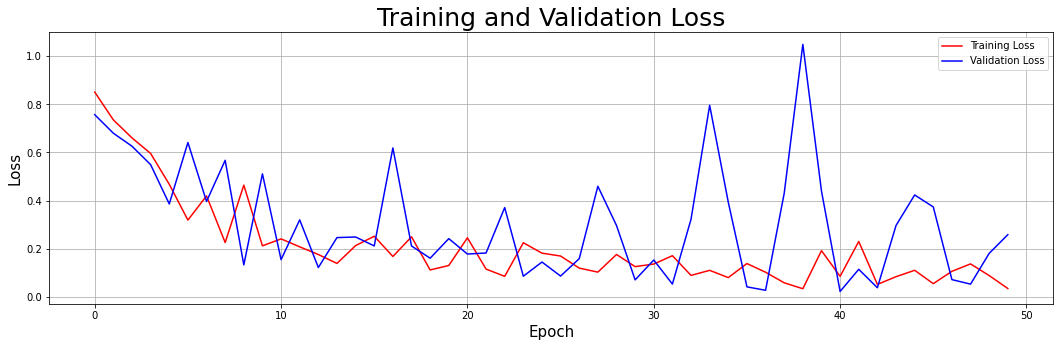

time: 253 ms (started: 2021-10-26 08:33:37 +00:00)


In [43]:
plot_loss(history)

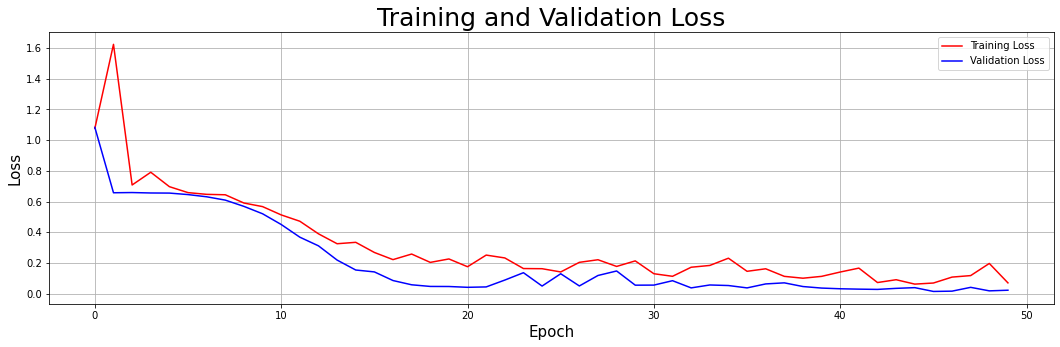

time: 277 ms (started: 2021-10-26 08:33:37 +00:00)


In [44]:
plot_loss(history_1)